# Prueba Intertrimestral

**Nombre: Álvaro**  
**Apellidos: González Tabernero**  

**Tiempo de la prueba:** 2 horas  
**Asignatura:** Desarrollo de Aplicaciones para la Visualización de Datos  
**Fecha:** 16 de octubre de 2025  

## Instrucciones

- Escribe **código limpio y autoexplicativo**.  
- Se pueden utilizar **los materiales de clase**.  
- Se puede utilizar **internet** para búsqueda de dudas y documentación.  
- **No se puede utilizar ningún tipo de LLM** (ChatGPT, Copilot, Gemini, etc.).  
- **No se puede utilizar mensajería instantánea**.  
- Al finalizar, **sube tu notebook a GitHub** y envía el enlace del fichero en el siguiente formulario:  
[https://forms.office.com/e/LFVwu9z6uQ](https://forms.office.com/e/LFVwu9z6uQ)


## Dataset “Life Style Data”

El dataset contiene información sobre hábitos de vida (alimentación, sueño, ejercicio, consumo de tabaco o alcohol, etc.) y medidas de salud (IMC, presión arterial, etc.) para diferentes individuos.

Puedes descargarlo del repositorio de la asignatura y un .txt con la descripción de las variables.


## Inicialización de librerías

In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
from io import StringIO
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    classification_report,
    confusion_matrix,
    silhouette_score
)
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    classification_report,
    confusion_matrix
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier, LogisticRegression

# Ejercicio 1 — Programación (2 puntos)

a) (0.6 pts) Crea una función imc(weight, height) que devuelva el índice de masa corporal (IMC), redondeado a dos decimales.



In [2]:
def imc(weight, height):
    return np.round(weight/math.pow(height,2),2)

imc(80,1.80)

np.float64(24.69)

b) (0.6 pts) Crea una función saludable(imcValue) que devuelva "Saludable" si el IMC está entre 18.5 y 24.9, "Bajo peso" si es menor de 18.5, o "Sobrepeso" si es mayor de 24.9.

In [3]:
def saludable(imcValue):
    valor = float(imcValue)
    if valor >= 18.5 and valor <= 24.9:
        return "Saludable"
    elif valor >= 25.0:
        return "Sobrepeso"
    else: return "Bajo peso"
    
saludable(11)

'Bajo peso'

c) (0.6 pts) Genera un DataFrame llamado imcData que contenga al menos 10 registros con las siguientes columnas:


*   peso (en kilogramos)

*   altura (en metros)

*   imc (calculado usando la función imc(weight, height) creada anteriormente)

Puedes generar los datos de peso y altura manualmente, mediante listas, o de forma aleatoria utilizando numpy (np.random.uniform o similar).

Añade una cuarta columna llamada categoria, cuyos valores provengan de la función saludable(imcValue).

Muestra las primeras filas del DataFrame resultante y comprueba que los tipos de datos son correctos.

In [4]:
df = pd.DataFrame()
df["peso"] = np.linspace(40,100,60)
df["altura"] = np.linspace(140,200,60)/100

In [5]:
lista = []
lista2 = []
for i in range(0,60):
    m = imc(df["peso"][i],df["altura"][i])
    lista.append(m)
    lista2.append(saludable(m))
    print(len(lista))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60


In [6]:
df["imc"] = lista
df["categoria"] = lista2
df.head()
#df.tail()

,peso,altura,imc,categoria
0,40.000000,1.400000,20.41,Saludable
1,41.016949,1.410169,20.63,Saludable
2,42.033898,1.420339,20.84,Saludable
3,43.050847,1.430508,21.04,Saludable
4,44.067797,1.440678,21.23,Saludable


d) (0.2 pts) ¿Cómo podrías integrar ambas funciones dentro de una clase llamada HealthTools que calcule el IMC y clasifique automáticamente a partir de listas de pesos y alturas?

In [7]:
class HealthTools():
    def __init__(self, pesos, alturas):
        self.pesos = pesos
        self.alturas = alturas
        self.results = pd.DataFrame()
    
    def saludable(imcValue):
        valor = float(imcValue)
        if valor >= 18.5 and valor <= 24.9:
            return "Saludable"
        elif valor >= 25.0:
            return "Sobrepeso"
        else: return "Bajo peso"
        
    def imc(weight, height):
        return np.round(weight/math.pow(height,2),2)
    
    def calculate(self):
        self.results["peso"] = self.pesos
        self.results["altura"] = self.alturas
        lista = []
        lista2 = []
        for i in range(0,len(self.pesos)):
            m = imc(df["peso"][i],df["altura"][i])
            lista.append(m)
            lista2.append(saludable(m))
            print(len(lista))

## Ejercicio 2 — Exploración y visualización (3 puntos)

a) (0.75 pts) Carga el dataset desde el fichero CSV y guárdalo en un DataFrame llamado lifeStyleData. Muestra las 5 primeras filas, el número de filas y columnas.

In [8]:
lifeStyleData = pd.read_csv("/Users/alvarogonzaleztabernero/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/ICAI/5/1er Cuatri/Desarrollo de Aplicaciones/Proyecto DAVD/RaceScope_DAVD/Inter_Oct25/Final_data.csv")
lifeStyleData.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


b) (0.75 pts) Crea una función describeData(dataFrame) que devuelva para cada columna: tipo de dato, número de valores nulos y porcentaje de nulos.

In [9]:
def describeData(df):
    return df.info()

describeData(lifeStyleData)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  float64
 1   Gender                          20000 non-null  object 
 2   Weight (kg)                     20000 non-null  float64
 3   Height (m)                      20000 non-null  float64
 4   Max_BPM                         19999 non-null  float64
 5   Avg_BPM                         19999 non-null  float64
 6   Resting_BPM                     20000 non-null  float64
 7   Session_Duration (hours)        20000 non-null  float64
 8   Calories_Burned                 20000 non-null  float64
 9   Workout_Type                    20000 non-null  object 
 10  Fat_Percentage                  20000 non-null  float64
 11  Water_Intake (liters)           20000 non-null  float64
 12  Workout_Frequency (days/week)   

c) (0.75 pts) Usa describeData(lifeStyleData) y comenta brevemente (2–3 líneas) qué variables parecen tener más valores faltantes.

haciendo una inspección visual, hay 1 valor faltante en Max_BPM, Avg_BPM y cholesterol_mg

d) (0.75 pts) Realiza un gráfico que muestre las correlaciones entre variables numéricas. ¿Hay alguna correlación fuerte o inesperada?

In [10]:
lifeStyleData = lifeStyleData.dropna()

In [11]:
lifeStyleData = lifeStyleData.select_dtypes(['float64'])

<Axes: >

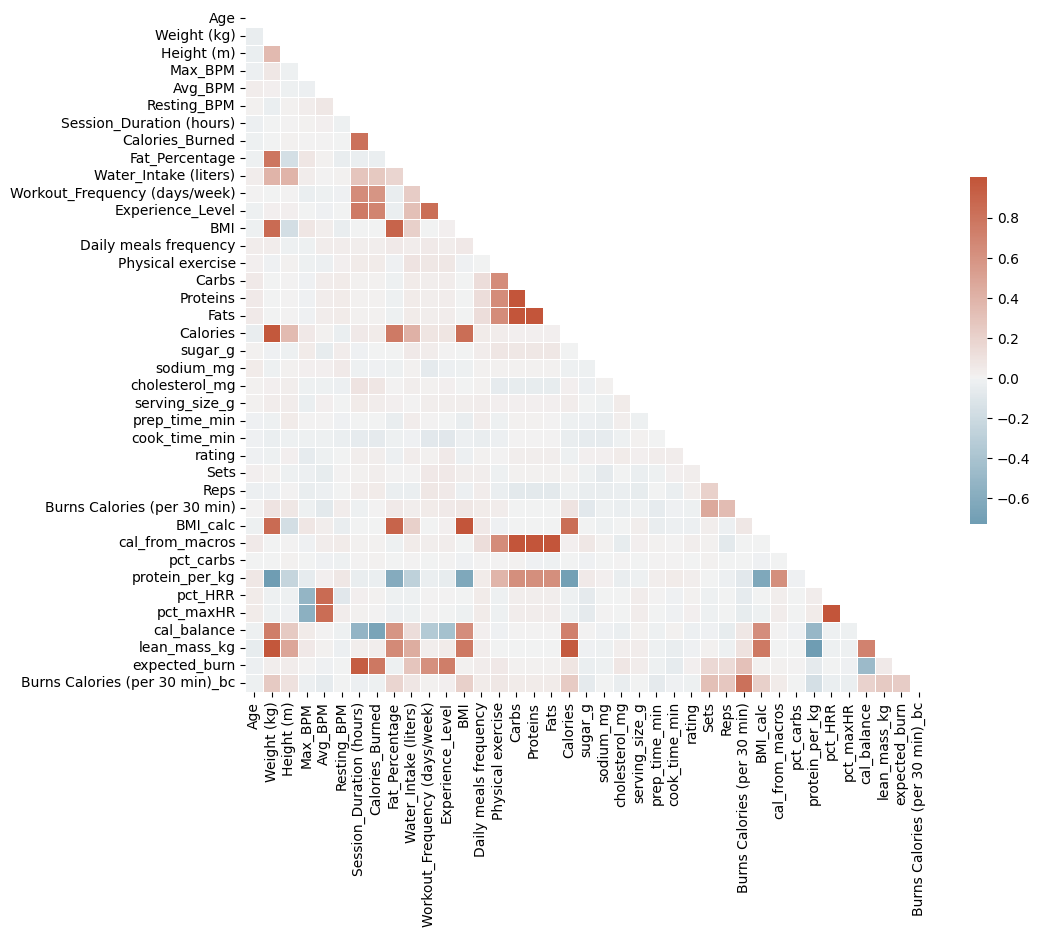

In [12]:
corr = lifeStyleData.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [13]:
for i in list(corr):
    print(corr[i])

Age                               1.000000
Weight (kg)                      -0.044170
Height (m)                       -0.037019
Max_BPM                          -0.028832
Avg_BPM                           0.039313
Resting_BPM                       0.013328
Session_Duration (hours)         -0.025400
Calories_Burned                  -0.021436
Fat_Percentage                   -0.025170
Water_Intake (liters)             0.037602
Workout_Frequency (days/week)     0.007121
Experience_Level                 -0.022504
BMI                              -0.017097
Daily meals frequency             0.037906
Physical exercise                 0.021602
Carbs                             0.052056
Proteins                          0.052262
Fats                              0.052158
Calories                         -0.041197
sugar_g                           0.011705
sodium_mg                         0.044933
cholesterol_mg                    0.012736
serving_size_g                    0.008797
prep_time_m

Analizando la imagen, visualmente es interesante ver la relación entre el contenido calórico de diferentes clases de alimentos, como puede ser las proteínas, las grasas y los carbohidratos. 

## Ejercicio 3 — Regresión básica (2 puntos)

Queremos predecir una variable de salud continua, por ejemplo bmi.

a) (0.25 pts) Define targetVar = "bmi" y selecciona 2–3 variables predictoras (por ejemplo sleepHours, activityLevel, calories). Guarda las columnas predictoras en X y la variable objetivo en y.

In [14]:
corr["BMI"].sort_values()

protein_per_kg                   -0.634637
Height (m)                       -0.166922
Resting_BPM                      -0.040765
prep_time_min                    -0.039219
rating                           -0.030547
Reps                             -0.030145
cook_time_min                    -0.028106
sodium_mg                        -0.020803
Age                              -0.017097
pct_maxHR                        -0.015224
Physical exercise                -0.010703
pct_carbs                        -0.006471
pct_HRR                          -0.004794
Calories_Burned                  -0.004436
Session_Duration (hours)         -0.004170
Carbs                            -0.003796
Fats                             -0.003763
cal_from_macros                  -0.003740
Proteins                         -0.003563
cholesterol_mg                    0.000359
Workout_Frequency (days/week)     0.000379
sugar_g                           0.000878
expected_burn                     0.012775
Experience_

In [15]:
y = lifeStyleData["BMI"]

X = pd.DataFrame()
X["Fat_Percentage"] = lifeStyleData["Fat_Percentage"]
X["Calories"] = lifeStyleData["Calories"]
X["lean_mass_kg"] = lifeStyleData["lean_mass_kg"]

b) (0.25 pts) Divide los datos en entrenamiento (70 %) y prueba (30 %).

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

c) (0.75 pts) Entrena un modelo de regresión lineal (LinearRegression) y calcula el R² y el MSE.

In [17]:
lm = Pipeline(steps=[
  ('scaler', StandardScaler()),
  ("lm", LinearRegression()),
])

lm = lm.fit(X_train, y_train)

print("Variance explanation R^2 = {}".format(round(lm.score(X, y),2)))

y_pred = lm.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Variance explanation R^2 = 0.87
Mean squared error: 5.83
Mean absolute error: 1.85
Coefficient of determination: 0.87


d) (0.75 pts) Entrena un RandomForestRegressor con los mismos datos y compara resultados. ¿Cuál tiene mejor rendimiento?

In [18]:
rf = RandomForestRegressor().fit(X_train, y_train)

rf = Pipeline(steps=[
  ('scaler', StandardScaler()),
  ("rf", RandomForestRegressor()),
])

rf = rf.fit(X_train, y_train)

print("Variance explanation R^2 = {}".format(round(rf.score(X, y),2)))

y_pred = rf.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Variance explanation R^2 = 0.96
Mean squared error: 4.61
Mean absolute error: 1.65
Coefficient of determination: 0.90


Como podemos observar con los resultados de la regresión lineal y el RF, el segundo acaba otorgando mejores resultados. En entrenamiento, la diferencia es notable, al ni siquiera alcanzaar el regresor lineal ni si quiera un 0.9 en el R^2, mientras que los resultados del entrenamiento del RF son fantásticos, explicando la varianza del 96% de los casos, lo cual es muy positivo para el modelo.

En cuanto a las predicciones del test se refiere, seguimos viendo la misma tendencia, observando una mejora notable en todos los resultados que devuelve el RF en todas las métricas. Aunque la diferecia en el test no es tan notable como la diferencia que encontrábamos en el entrenamiento, sigue siendo claramente el mejor modelo de entre los dos.

## Ejercicio 4 — Clasificación sencilla (2 puntos)

Crea una nueva variable binaria que indique si el IMC está dentro del rango saludable.

a) (0.25 pts) Crea una nueva columna bmiHealthy donde el valor sea 1 si bmi está entre 18.5 y 24.9, y 0 en caso contrario.

In [19]:
lista = []
for i in range(0,60):
    m = imc(df["peso"][i],df["altura"][i])
    if m > 24.9 or m < 18.5:
        v = 0
    else:
        v = 1
    lista.append(v)
print(lista)
df["saludable"] = lista

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [20]:
df.head()

,peso,altura,imc,categoria,saludable
0,40.000000,1.400000,20.41,Saludable,1
1,41.016949,1.410169,20.63,Saludable,1
2,42.033898,1.420339,20.84,Saludable,1
3,43.050847,1.430508,21.04,Saludable,1
4,44.067797,1.440678,21.23,Saludable,1


In [21]:
df.tail()

,peso,altura,imc,categoria,saludable
55,95.932203,1.959322,24.99,Bajo peso,0
56,96.949153,1.969492,24.99,Bajo peso,0
57,97.966102,1.979661,25.00,Sobrepeso,0
58,98.983051,1.989831,25.00,Sobrepeso,0
59,100.000000,2.000000,25.00,Sobrepeso,0


b) (0.75 pts) Entrena un modelo de regresión logística (LogisticRegression) para predecir bmiHealthy usando algunas variables de estilo de vida (por ejemplo sleepHours, activityLevel, calories).

In [22]:
X = df.loc[:, df.columns!= 'saludable']
dummies = pd.get_dummies(X["categoria"],dtype=float)
X = pd.concat([X,dummies],axis=1)
X.drop(columns=["categoria"], inplace=True, errors='ignore')
y = df['saludable']
X.tail()

,peso,altura,imc,Bajo peso,Saludable,Sobrepeso
55,95.932203,1.959322,24.99,1.0,0.0,0.0
56,96.949153,1.969492,24.99,1.0,0.0,0.0
57,97.966102,1.979661,25.00,0.0,0.0,1.0
58,98.983051,1.989831,25.00,0.0,0.0,1.0
59,100.000000,2.000000,25.00,0.0,0.0,1.0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

clf_log = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ("glm", LogisticRegression(max_iter=10000, tol=0.1)),
])

clf_log = LogisticRegression(max_iter=10000, tol=0.1)
clf_log.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.1
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


c) (0.25 pts) Calcula la exactitud (accuracy) del modelo y muestra la matriz de confusión.


In [24]:
predictions = clf_log.predict(X_test)

print("Classification report")
print(classification_report(y_test, predictions))

print("Confusion matrix")
print(confusion_matrix(y_test, predictions))

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        15

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

Confusion matrix
[[ 3  0]
 [ 0 15]]


d) (0.75 pts) Explica qué variable parece influir más según el modelo.

## Ejercicio 5 — Conclusión (1 punto)

En un máximo de 300 palabras, resume:

*   Qué hábitos parecen tener mayor relación con el estado de salud.

*   Qué modelo fue más eficaz y por qué.

*   Qué podrías mejorar si tuvieras más tiempo o datos.

